# Are there any counties that don't have any higher education institutions (_education deserts_)?

## What are the (demographic) characteristics of those counties?

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from pathlib import Path

from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'23-Apr-20'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(PROCESSED_DATA)

+ ../data/processed
    + counties.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutional_characteristics.csv
    + processed_data.csv


In [4]:
county_data = pd.read_csv(PROCESSED_DATA / 'counties.csv')

In [5]:
county_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [6]:
institutions_data = pd.read_csv(PROCESSED_DATA / 'institutional_characteristics.csv')

In [7]:
institutions_data.head().T

,0,1,2,3,4
institution_name,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
longitude,-108.758,-99.7098,-83.5283,-118.257,-93.2998
latitude,48.4842,32.4689,31.4819,34.1463,44.8557
fips_state_code,Montana,Texas,Georgia,California,Minnesota
total_enrollment,150,5204,4291,217,99
full-time_enrollment,108,3730,2660,194,81
part-time_enrollment,42,1474,1631,23,18
control,Public,Private not-for-profit,Public,Private for-profit,Private for-profit
level,2-year,4-year or above,4-year or above,4-year or above,4-year or above


In [8]:
county_shapes = gpd.read_file(PROCESSED_DATA / 'geodata' / 'tl_2019_us_county.shp')

In [9]:
county_shapes.head().T

,0,1,2,3,4
STATEFP,31,53,35,31,31
COUNTYFP,039,069,011,109,129
COUNTYNS,00835841,01513275,00933054,00835876,00835886
GEOID,31039,53069,35011,31109,31129
NAME,Cuming,Wahkiakum,De Baca,Lancaster,Nuckolls
NAMELSAD,Cuming County,Wahkiakum County,De Baca County,Lancaster County,Nuckolls County
LSAD,06,06,06,06,06
CLASSFP,H1,H1,H1,H1,H1
MTFCC,G4020,G4020,G4020,G4020,G4020
CSAFP,None,None,None,339,None


In [10]:
import us

In [11]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
mask_contiguous_fips = county_shapes['STATEFP'].isin(contiguous_fips)
county_shapes = county_shapes[mask_contiguous_fips]

In [12]:
contiguous_states = [state.name for state in us.STATES_CONTIGUOUS]
mask_contiguous_states = institutions_data['fips_state_code'].isin(contiguous_states)
institutions_data = institutions_data[mask_contiguous_states]

### Majority underrepresented group?? 

In [13]:
county_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [14]:
county_data['share_underrepresented'] = (county_data['black_alone'] + 
    county_data['american_indian_and_alaska_native'] + 
    county_data['native_hawaiian_and_pacific_islander'] + 
    county_data['latino_alone']) / county_data['universe']

In [15]:
county_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [16]:
subset_county_data = county_data[['geoid', 'name', 'share_underrepresented']].copy()
subset_county_shapes = county_shapes[['GEOID', 'NAME', 'geometry']].copy()

In [17]:
subset_county_data['geoid'] = subset_county_data['geoid'].astype(str).str.zfill(5)

In [18]:
subset_county_data.set_index('geoid', inplace = True)
subset_county_shapes.set_index('GEOID', inplace = True)

In [19]:
working_gdf = subset_county_shapes.join(subset_county_data)

In [20]:
working_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
geo_institutions = gpd.GeoDataFrame(institutions_data, geometry = gpd.points_from_xy(institutions_data['longitude'], institutions_data['latitude']))

In [22]:
geo_institutions.crs = working_gdf.crs

In [23]:
counties_with_institutions = gpd.sjoin(working_gdf, geo_institutions, how='inner', op='contains')

In [24]:
counties_with_institutions = counties_with_institutions.drop_duplicates('name')

In [25]:
working_gdf.shape

(3108, 4)

In [26]:
counties_with_institutions.shape

(1272, 14)

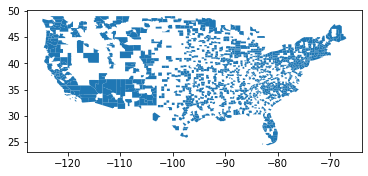

In [27]:
counties_with_institutions.plot();

In [28]:
counties_without_institutions_list = [county for county in working_gdf['name'].values if county not in counties_with_institutions['name'].values]
mask_counties_without_institutions = working_gdf['name'].isin(counties_without_institutions_list)

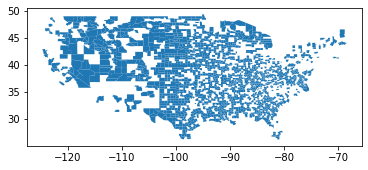

In [29]:
counties_without_institutions = working_gdf[mask_counties_without_institutions]

counties_without_institutions.plot();

# Characteristics of each subset

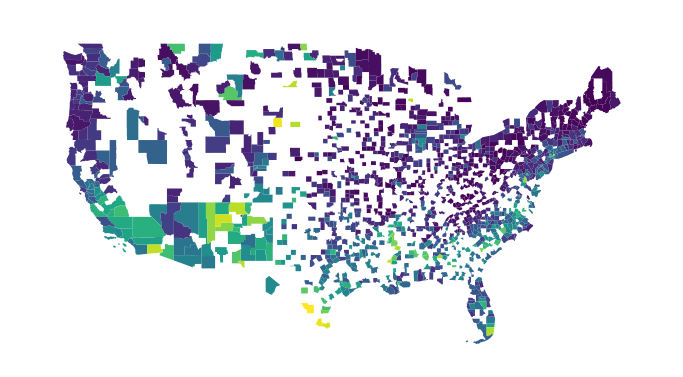

In [30]:
gplt.choropleth(counties_with_institutions, projection=gcrs.WebMercator(), hue = 'share_underrepresented', figsize=(12,12))

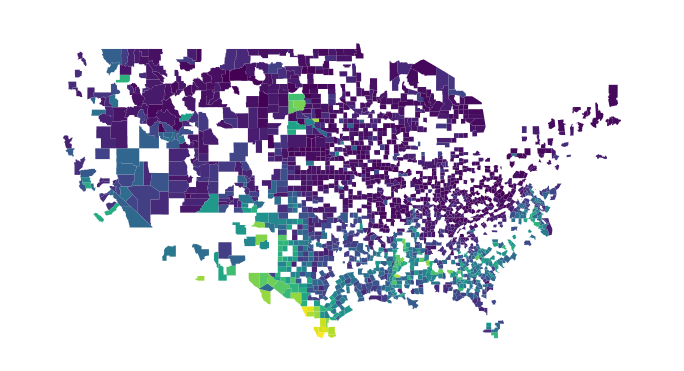

In [31]:
gplt.choropleth(counties_without_institutions, projection=gcrs.WebMercator(), hue = 'share_underrepresented', figsize=(12,12))

In [32]:
counties_with_institutions.head().T

GEOID,31109,46099,39063,48189,39003
NAME,Lancaster,Minnehaha,Hancock,Hale,Allen
geometry,"POLYGON ((-96.91075099999999 40.784944, -96.91...","POLYGON ((-97.129283 43.58682599999999, -97.12...","POLYGON ((-83.88076199999999 41.080361, -83.88...","POLYGON ((-102.087626 34.026563, -102.087792 3...","POLYGON ((-84.397189 40.786584, -84.397198 40...."
name,"Lancaster County, Nebraska","Minnehaha County, South Dakota","Hancock County, Ohio","Hale County, Texas","Allen County, Ohio"
share_underrepresented,0.112537,0.124772,0.0674858,0.634831,0.149582
index_right,1996,173,3097,3560,1481
institution_name,Myotherapy Institute,Augustana University,The University of Findlay,Wayland Baptist University,James A Rhodes State College
longitude,-96.6233,-96.737,-83.6523,-101.73,-84.0263
latitude,40.7723,43.5251,41.0533,34.1877,40.7383
fips_state_code,Nebraska,South Dakota,Ohio,Texas,Ohio
total_enrollment,11,2133,4870,4504,4002


In [33]:
counties_with_institutions['share_underrepresented'].mean()

0.22446120819235205

In [34]:
counties_without_institutions['share_underrepresented'].mean()

0.18169141152568655

In [35]:
counties_without_institutions.head()

,NAME,geometry,name,share_underrepresented
GEOID,,,,
31039,Cuming,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...","Cuming County, Nebraska",0.102769
53069,Wahkiakum,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...","Wahkiakum County, Washington",0.088327
35011,De Baca,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...","De Baca County, New Mexico",0.476699
31129,Nuckolls,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...","Nuckolls County, Nebraska",0.029474
48327,Menard,"POLYGON ((-99.82187 31.08721, -99.81877 31.087...","Menard County, Texas",0.355158


Now that we have the list of counties with and without institutions we can use `census-data-downloader` to explore more statistics about these counties.


on your terminal, let's get mendianhouseholdincome and medianage

***
After you run it...

In [36]:
tree(EXTERNAL_DATA)

+ ../data/external
    + 4-8-2020---748.zip
    + processed
            + acs5_2018_race_counties-checkpoint.csv
        + acs5_2018_medianage_counties.csv
        + acs5_2018_medianhouseholdincome_counties.csv
        + acs5_2018_race_counties.csv
    + raw
        + acs5_2018_medianage_counties.csv
        + acs5_2018_medianhouseholdincome_counties.csv
        + acs5_2018_race_counties.csv
    + tl_2019_us_county.zip


In [37]:
median_age = pd.read_csv(EXTERNAL_DATA / 'processed' / 'acs5_2018_medianage_counties.csv')
median_hh_income = pd.read_csv(EXTERNAL_DATA / 'processed' / 'acs5_2018_medianhouseholdincome_counties.csv')

In [38]:
median_age.head()

,geoid,name,median,median_annotation,median_moe,median_moe_annotation,male,male_annotation,male_moe,male_moe_annotation,female,female_annotation,female_moe,female_moe_annotation,state,county
0,30019,"Daniels County, Montana",50.7,NaN,4.9,NaN,49.4,NaN,7.5,NaN,52.3,NaN,6.3,NaN,30,19
1,72073,"Jayuya Municipio, Puerto Rico",37.8,NaN,0.9,NaN,36.1,NaN,1.1,NaN,40.1,NaN,2.5,NaN,72,73
2,39173,"Wood County, Ohio",34.8,NaN,0.2,NaN,33.6,NaN,0.3,NaN,36.0,NaN,0.3,NaN,39,173
3,24023,"Garrett County, Maryland",45.6,NaN,0.3,NaN,44.4,NaN,0.4,NaN,47.0,NaN,0.5,NaN,24,23
4,30079,"Prairie County, Montana",51.8,NaN,7.0,NaN,53.0,NaN,7.5,NaN,49.7,NaN,6.8,NaN,30,79


In [39]:
median_hh_income.head()

,geoid,name,median,median_annotation,median_moe,median_moe_annotation,state,county
0,30019,"Daniels County, Montana",54750.0,NaN,2497.0,NaN,30,19
1,72073,"Jayuya Municipio, Puerto Rico",15424.0,NaN,2978.0,NaN,72,73
2,39173,"Wood County, Ohio",59789.0,NaN,1513.0,NaN,39,173
3,24023,"Garrett County, Maryland",49619.0,NaN,1948.0,NaN,24,23
4,30079,"Prairie County, Montana",47250.0,NaN,6386.0,NaN,30,79


In [40]:
# fix geoid
median_age['geoid'] = median_age['geoid'].astype(str).str.zfill(5)
median_hh_income['geoid'] = median_hh_income['geoid'].astype(str).str.zfill(5)

In [41]:
median_age = median_age[['geoid', 'median', 'male', 'female']]
median_age.columns = ['geoid', 'median_age', 'median_age_male', 'median_age_female']
median_age.set_index('geoid', inplace = True)

In [42]:
median_hh_income = median_hh_income[['geoid', 'median']]
median_hh_income.columns = ['geoid', 'median_hh_income']
median_hh_income.set_index('geoid', inplace=True)

In [43]:
counties_with_institutions = counties_with_institutions.join(median_age, how = 'left',).join(median_hh_income, how = 'left')

In [44]:
counties_without_institutions = counties_without_institutions.join(median_age, how = 'left',).join(median_hh_income, how = 'left')

More stats

In [45]:
columns_of_interest = [
    'median_age', 
    'median_age_male', 
    'median_age_female', 
    'median_hh_income', 
    'share_underrepresented',
]

In [46]:
counties_with_institutions[columns_of_interest].describe()

,median_age,median_age_male,median_age_female,median_hh_income,share_underrepresented
count,1272.000000,1272.000000,1272.000000,1271.000000,1272.000000
mean,39.022956,37.690959,40.380503,54352.334382,0.224461
std,4.853074,4.708997,5.044979,14574.964608,0.191612
min,21.700000,21.200000,22.600000,21093.000000,0.015697
25%,36.100000,34.900000,37.300000,44808.500000,0.074730
50%,39.300000,37.800000,40.700000,51829.000000,0.155409
75%,41.900000,40.500000,43.600000,60377.500000,0.327119
max,57.900000,56.600000,58.600000,121133.000000,0.958372


In [47]:
counties_without_institutions[columns_of_interest].describe()

,median_age,median_age_male,median_age_female,median_hh_income,share_underrepresented
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,42.918083,41.599510,44.302723,49354.568627,0.181691
std,5.155767,5.338054,5.155822,12479.289766,0.192897
min,23.700000,21.600000,26.400000,20188.000000,0.000000
25%,39.800000,38.300000,41.300000,40899.750000,0.038773
50%,42.700000,41.200000,44.200000,48373.500000,0.096512
75%,46.000000,44.600000,47.300000,55473.750000,0.281957
max,67.000000,66.500000,67.300000,136268.000000,0.991126
